First, we must import all necessary libraries:

In [1]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# 1. The Potential

We must first define the potential that we want to compute the quantized hamiltonian dynamics of. We can name this variable `potential`, and define its parameters.

Here, we have chosen to define the potential as a **Morse Potential**, that corresponds to the following equation:

$$V(q) = D*(1-e^{-\alpha(q-q_0)})^2$$

Now, we must define the parameters so the above cell can run properly. We must define `D`, `alpha`, and `q_0`. `q` is a variable, not a constant, and so we will express this using the `linspace` function in `numpy`. All constants will be defined with *atomic units*.

In [2]:
D = 4.419 * 0.0367493
alpha = 2.567
q_0 = 0

q = np.linspace(-10, 10, 1000)

We can now define the potential as the variable `potential`.

In [3]:
potential = D * (1 - np.exp(-alpha*(q-q_0)))**2

We can now plot to examine what this potential looks like, using the `matplotlib.pyplot` library.

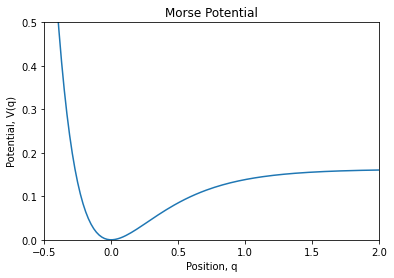

In [4]:
plt.plot(q, potential)
plt.title("Morse Potential")
plt.xlim(-0.5, 2)
plt.xlabel("Position, q")
plt.ylim(0, 0.5)
plt.ylabel("Potential, V(q)")
plt.savefig('QHD_morse_vVq.png')
plt.show()

# 2. Quantized Hamiltonian Dynamics Derivations

Here, we use the pysces library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, `p2`, `x`, `x2`, and `xp` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbollically. This can be done by:

In [5]:
# First, we must define all the parameters as stated in section 1 as symbols:

D, alpha, q_0, q = symbols("D, alpha, q_0, q")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

In [6]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

The above cell shows the first and second derivatives of the potential, given symbolically.

**2.2 Change of Variable**

We can do a change of variable in the potential to:

$$x=e^{-\alpha q}$$

And so:

$$V(q)=D[x^2-2x]$$

We will now take the first and second derivatives of the original potential, and then perform the change of variables.

- The First Derivative:

In [7]:
diff11 = diff1.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff11

- The Second Derivative:

In [8]:
diff22 = diff2.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff22

We can now solve for the equations of motion.

**2.3 Solving for the Equations of Motion**

In [9]:
# Again, we must first define all variables as symbols. #

q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")



########## EOM Calculations ##########

# If you want to see the output, uncomment the desired print line. #

q1 = QHD_int(q, 1, dt)

#print(q1)

x1 = QHD_int(x, 1, dt)

#print(x1)

x21 = QHD_int(x, 2, dt)

#print(x21)

xp1 = QHD_int(xp, 1, dt)

#print(xp1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

#print(p21)

Now, we are ready to make plots of the data based on the EOM's as computed above.

# 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations:

In [32]:
######## PLEASE MAKE CHANGES TO THE BELOW PARAMETERS ONLY: ########

### Potential Specific Variables: ###

D = 4.419 * 0.0367493
alpha = 2.567
q_0 = 0

### Mass of System: ###

mass = 1836

######## DO NOT CHANGE THE BELOW PARAMETERS: ########

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

### Constants: ###

hbar = 0.6582  # eV * fs

### Initial Conditions: ###

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


Etot, Etot_cl = Etot0, Etot_cl0

q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2


### DO NOT CHANGE THE BELOW EITHER ###

dt = 0.0
p = QHD_int(p, 1, dt)
p2 = QHD_int(p, 2, dt)
Ekin_cl = 0.5*p*p/mass
Ekin    = 0.5*p2/mass
Epot_cl = D*(math.exp(-2.0*alpha*q) - 2.0*math.exp(-alpha*q))
Epot    = D*(x2 - 2.0*x)
Etot_cl = Ekin_cl + Epot_cl
Etot    = Ekin    + Epot

Etot, Etot_cl = Etot0,Etot_cl0

# If change of variable occurred for derivatives, please change the below: 
x = exp(-alpha*q0)*exp(0.5*alpha*alpha*s0*s0)
x2 = exp(-2.0*alpha*q0)*exp(2.0*alpha*alpha*s0*s0)
xp = x*(p - s0*ps0*alpha)

Now, we can define the x and y values (x being time).

In [33]:
### Time how long it takes cell to run ###

import time 
begin = time.time()

### Empty Lists to Store Data: ###

q_list = []
y_list = []
y_list1 = []
y_list2 = []

### Covers the x values. The range from time (t) to time (T) with step size of (dt) ###

dt = 0.1
t = 0.0
T = 5000

### Compute the y values ###

while t <= T:
    xp = eval(str(xp1))
    
    x2 = eval(str(x21))
    
    x = eval(str(x1))
   
    q = eval(str(q1))  
    
    p = eval(str(p1))
    
    p2 = eval(str(p21))
    
    Ekin_cl = 0.5*p**2/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(exp(-2.0*alpha*q) - 2.0*exp(-alpha*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

#    Etot = Etot0
    
#    Etot1 = Etot/Etot0
    
#    y_list.append(Etot1)
    y_list1.append(Etot)
    y_list2.append(Etot_cl)
    
    q_list.append(q)
    
    t = t + dt
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 425.3306863307953


In [10]:
### Time how long it takes to compute ###

import time 
begin = time.time()


### Parameters: ###

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0


D = 4.419
mass = 1836
alpha = 2.56
hbar = 0.6582  # eV * fs

q_list = []
y_list = []
y_list1 = []
y_list2 = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = exp(-alpha*q0)*exp(0.5*alpha*alpha*s0*s0)
x2 = exp(-2.0*alpha*q0)*exp(2.0*alpha*alpha*s0*s0)
xp = x*(p - s0*ps0*alpha)

Etot, Etot_cl = Etot0, Etot_cl0

dt = 0.0
p = QHD_int(p, 1, dt)
p2 = QHD_int(p, 2, dt)
Ekin_cl = 0.5*p*p/mass
Ekin    = 0.5*p2/mass
Epot_cl = D*(math.exp(-2.0*alpha*q) - 2.0*math.exp(-alpha*q))
Epot    = D*(x2 - 2.0*x)
Etot_cl = Ekin_cl + Epot_cl
Etot    = Ekin    + Epot

Etot, Etot_cl = Etot0,Etot_cl0


### Compute the y values ###

dt = 0.1
t = 0.0
T = 5000

y_list = []

while t <= T:
    xp = eval(str(xp1))
    
    x2 = eval(str(x21))
    
    x = eval(str(x1))
   
    q = eval(str(q1))  
    
    p = eval(str(p1))
    
    p2 = eval(str(p21))
    
    Ekin_cl = 0.5*p**2/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(exp(-2.0*alpha*q) - 2.0*exp(-alpha*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

#    Etot = Etot0
    
#    Etot1 = Etot/Etot0
    
#    y_list.append(Etot1)
    y_list1.append(Etot)
    y_list2.append(Etot_cl)
    
    q_list.append(q)
    
    t = t + dt
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 617.4963700771332


For the x values, we create a range with `(t, T, dt)` as the parameters.

In [11]:
### Define the x values ###

x_list = np.arange(0, 5000, 0.1)

#for i in range(0, len(x_list)):
#    x_list[i] = x_list[i]*0.02418884254 # a.u. to femtoseconds

**3.2 Position versus Time**

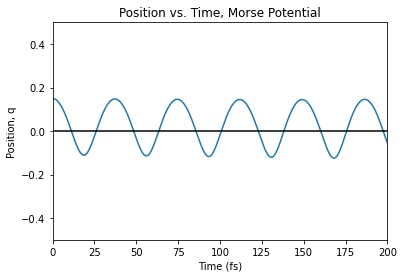

In [12]:
plt.plot(x_list, q_list)
plt.plot([0, 500], [0, 0], "k-")
plt.title("Position vs. Time, Morse Potential")
plt.xlim(0, 200)
plt.xlabel("Time (fs)")
plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('QHD_morse_qVt.png')
plt.show()

**3.3 Energy versus Time**

ValueError: x and y must have same first dimension, but have shapes (50000,) and (0,)

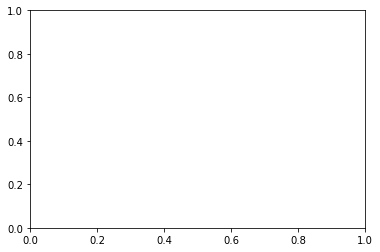

In [36]:
plt.plot(x_list, y_list)
plt.plot(x_list, y_list1, "k")
plt.plot(x_list, y_list2, "m")
plt.legend(["E/E_0", "E", "E_0"])
#plt.plot([0, 500], [0, 0], "k-")
plt.title("Energy vs. Time, Morse Potential")
plt.xlim(0, 1000)
plt.xlabel("Time (fs)")
plt.ylim(-5, 0.5)
plt.ylabel("Energy, eV")
plt.savefig('morse_eVt.png')
plt.show()

We can also look at the graphs separately by making a subplot:

Text(0.5, 1.0, 'Classical Energy vs. Time, Morse Potential')

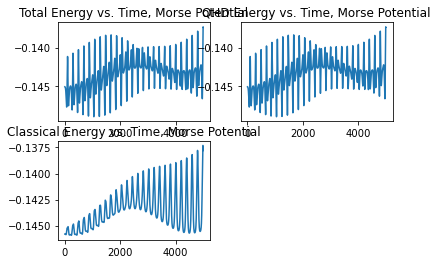

In [38]:
plt.subplot(2, 2, 1)
plt.plot(x_list, y_list1)
plt.title("Total Energy vs. Time, Morse Potential")
plt.subplot(2, 2, 2)
plt.plot(x_list, y_list1)
plt.title("QHD Energy vs. Time, Morse Potential")
plt.subplot(2, 2, 3)
plt.plot(x_list, y_list2)
plt.title("Classical Energy vs. Time, Morse Potential")